### Regression MovieLens

This example shows how to use DeepFM to solve a simple binary regression task

In [28]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from deepctr.models import DeepFM
from deepctr.feature_column import SparseFeat, get_feature_names

In [2]:
data = pd.read_csv("./movielens_sample.txt")
data.info()
data.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     200 non-null    int64 
 1   movie_id    200 non-null    int64 
 2   rating      200 non-null    int64 
 3   timestamp   200 non-null    int64 
 4   title       200 non-null    object
 5   genres      200 non-null    object
 6   gender      200 non-null    object
 7   age         200 non-null    int64 
 8   occupation  200 non-null    int64 
 9   zip         200 non-null    object
dtypes: int64(6), object(4)
memory usage: 15.8+ KB


,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip
0,3299,235,4,968035345,Ed Wood (1994),Comedy|Drama,F,25,4,19119
1,3630,3256,3,966536874,Patriot Games (1992),Action|Thriller,M,18,4,77005


In [3]:
sparse_features = ["movie_id", "user_id", "gender", "age", "occupation", "zip"]
target = ["rating"]

In [4]:
# label encoding for sparse features and do simple transformation for dense features
for feat in sparse_features:
    lbe = LabelEncoder()
    data[feat] = lbe.fit_transform(data[feat])

fixlen_feature_columns = [SparseFeat(feat, data[feat].max() + 1, embedding_dim=4) for feat in sparse_features]
linear_feature_columns = fixlen_feature_columns
dnn_feature_columns = fixlen_feature_columns

In [5]:
feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

In [6]:
# generate input data for model
train, test = train_test_split(data, test_size=0.2, random_state=43)
train_model_input = {name: train[name].values for name in feature_names}
test_model_input = {name: test[name].values for name in feature_names}

In [11]:
train_model_input["movie_id"]

array([ 99, 165, 153, 168,  19,  63,  90,  91, 142,  95, 137, 143, 114,
        72,  71, 174,  40,  84, 130,  96,  76,  69,  54, 136,  35, 123,
       158, 178,  23, 129, 122, 134,   5, 104,  55,  68, 115,   3,  86,
        60, 157,  37, 166,  34, 107,  41, 170,   4,  66, 149, 152, 154,
       167, 180, 169, 102,  27,  57, 163, 161, 160,   8,  27,  94, 151,
        20,  45,  74, 121,  98, 128,  30, 108, 146, 126, 119, 124, 139,
       177,  29, 110,  28,  64,  21,  85,  80, 125, 101, 170, 118,  52,
        81, 149, 132,  13,  59,  32,  77,  43,  78, 127,   7,  16, 141,
        87, 184,  88,  18,  39, 164,  66, 156, 100,  73,  89,   1, 111,
        61, 120, 112,  92, 144, 181, 135,  44,  53, 140,  50,  26,   9,
       185,  62, 150, 116, 159,  42,  10,  34, 112,  72,  22, 172,  14,
        48, 182, 117,  15,  56,  51,  38,  35, 186, 155, 126, 109,  46,
        67,  83,  79,   9])

### Define model, train, predict and evaluate

In [12]:
model = DeepFM(linear_feature_columns, dnn_feature_columns, task="regression")
model.compile("adam", "mse", metrics =["mse"])

In [13]:
train[target].value_counts(), type(train[target].values)

(rating
 4         51
 5         41
 3         40
 2         19
 1          9
 dtype: int64,
 numpy.ndarray)

In [14]:
EPOCHS = 40
BATCH_SIZE = 256
history = model.fit(train_model_input, train[target].values, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2, validation_split=0.2)

Epoch 1/40
1/1 - 1s - loss: 14.0547 - mse: 14.0547 - val_loss: 15.1145 - val_mse: 15.1145
Epoch 2/40
1/1 - 0s - loss: 13.9345 - mse: 13.9345 - val_loss: 14.9793 - val_mse: 14.9793
Epoch 3/40
1/1 - 0s - loss: 13.7844 - mse: 13.7844 - val_loss: 14.8370 - val_mse: 14.8370
Epoch 4/40
1/1 - 0s - loss: 13.6265 - mse: 13.6265 - val_loss: 14.6828 - val_mse: 14.6828
Epoch 5/40
1/1 - 0s - loss: 13.4569 - mse: 13.4569 - val_loss: 14.5143 - val_mse: 14.5143
Epoch 6/40
1/1 - 0s - loss: 13.2739 - mse: 13.2739 - val_loss: 14.3296 - val_mse: 14.3296
Epoch 7/40
1/1 - 0s - loss: 13.0747 - mse: 13.0747 - val_loss: 14.1263 - val_mse: 14.1263
Epoch 8/40
1/1 - 0s - loss: 12.8559 - mse: 12.8559 - val_loss: 13.9028 - val_mse: 13.9028
Epoch 9/40
1/1 - 0s - loss: 12.6152 - mse: 12.6152 - val_loss: 13.6561 - val_mse: 13.6561
Epoch 10/40
1/1 - 0s - loss: 12.3502 - mse: 12.3502 - val_loss: 13.3847 - val_mse: 13.3847
Epoch 11/40
1/1 - 0s - loss: 12.0580 - mse: 12.0580 - val_loss: 13.0858 - val_mse: 13.0858
Epoch 12

In [15]:
pred_ans = model.predict(test_model_input, batch_size=256)
print("test MSE", round(mean_squared_error(
        test[target].values, pred_ans), 4))

test MSE 1.0966


In [16]:
test[target].values

array([[1],
       [5],
       [4],
       [2],
       [3],
       [4],
       [3],
       [5],
       [3],
       [5],
       [2],
       [3],
       [4],
       [3],
       [3],
       [4],
       [4],
       [5],
       [3],
       [4],
       [4],
       [4],
       [5],
       [2],
       [4],
       [3],
       [4],
       [4],
       [3],
       [3],
       [5],
       [4],
       [4],
       [3],
       [3],
       [3],
       [2],
       [5],
       [4],
       [3]])

In [17]:
pred_ans

array([[3.1099322],
       [3.293174 ],
       [3.1470604],
       [3.0889032],
       [3.0627327],
       [3.6745555],
       [3.0714886],
       [3.1335905],
       [3.107466 ],
       [3.041648 ],
       [3.5644834],
       [3.1263747],
       [3.1588342],
       [3.1307755],
       [3.161245 ],
       [3.0845685],
       [3.126396 ],
       [3.2899983],
       [3.1144679],
       [3.1307263],
       [3.0716665],
       [3.292767 ],
       [3.0904503],
       [3.1498594],
       [3.095505 ],
       [3.114734 ],
       [3.5120618],
       [3.152401 ],
       [3.1779606],
       [3.0037158],
       [3.1277378],
       [3.0639546],
       [3.0986927],
       [3.0636587],
       [3.0628386],
       [3.626166 ],
       [3.0572824],
       [3.0656147],
       [3.869737 ],
       [3.114643 ]], dtype=float32)

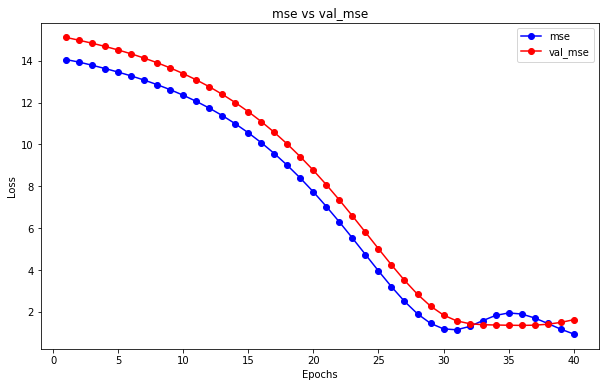

In [18]:
import matplotlib.pyplot as plt
# Extract loss and validation loss values
def plot_history(history, train_metric: str, val_metric: str):
    history_dict = history.history

    loss = history_dict[train_metric]
    val_loss = history_dict[val_metric]
    # Create an array with epoch numbers
    epochs = range(1, len(loss) + 1)

    # Plotting the training and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, 'bo-', label=train_metric)
    plt.plot(epochs, val_loss, 'ro-', label=val_metric)
    plt.title(f'{train_metric} vs {val_metric}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(history, "mse", "val_mse")

### Model Inference

In [24]:
sample_data = data.iloc[0]
sample_data

user_id                  107
movie_id                  12
rating                     4
timestamp          968035345
title         Ed Wood (1994)
genres          Comedy|Drama
gender                     0
age                        2
occupation                 4
zip                       35
Name: 0, dtype: object

In [31]:
inference_model_input = {feat: np.array([sample_data[feat]]) for feat in feature_names}
inference_model_input

{'movie_id': array([12]),
 'user_id': array([107]),
 'gender': array([0]),
 'age': array([2]),
 'occupation': array([4]),
 'zip': array([35])}

In [32]:
model.predict(inference_model_input)

array([[3.071666]], dtype=float32)